# Evaluate private factorization on hospitals recommendations.

We compare different approaches to learn recommender systems for real hospital data. <br/><br/>

This notebook is organized as follows: <br/><br/>

   1. Learn a recommender system assuming centralized public data. <br/><br/>
   2. Learn local models for each hospital <br/><br/>
   3. Learn from private prototypes. Here we follow the same procedure as private factorization in exp2



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import random
from utils import give_percentiles_all, avg_rank, process_data, train_eval, \
        create_patient_int, give_percentiles, process_idx_users_items
from private_kmeans import clustering, eval_pred
import pickle

import warnings
warnings.filterwarnings('ignore')

from scipy.sparse import csr_matrix
from sklearn.decomposition import NMF

rand_seed = 7
random.seed(rand_seed)
np.random.seed(rand_seed)

In [ ]:
if not os.path.exists('exp3/figures/'):
    os.makedirs('exp3/figures/')


In [2]:
data_all = pd.read_csv('exp3/data_train_test_labs_meds.csv', index_col = 0)


In [3]:

# Factorization parameters
L = [ 10, 20,30,40,50]
reg = 0.1


# k-means parameters
ks = [10, 50,100]
#### DO AN ELBOW METHOD!!!!!! DON"T RUN ALL THIS
# Privacy parameters
epsilon = 0.1
delta = 0.1


# hospitals
list_hosp_all = data_all.hospitalid.unique().tolist()           #  all hospitals
big_hosp = list(data_all.hospitalid.value_counts().index)[:25]  #  Use only 25 hospitals

# 1. Centralized (traditional - standard) NMF

In [ ]:
RESULTS_full = {}
it = data_all.name.unique().shape[0]
for n_c in L:
        RESULTS_full[n_c] = train_eval(data_all, n_c,reg, total_items=it)
        pickle.dump(RESULTS_full, open("exp3/results_full.p", "wb"))  # save it into a file named save.p




 Finished factorizing

 Finished factorizing

 Total number of test users: 38137

 RMSE:  0.027506189053011783  --  RMSE train: 1.979432599126096  --  RMSE test: 4.668460963248267  
users  1000 --  Average ranking:  0.10300468643520075
users  2000 --  Average ranking:  0.09835669846493458
users  3000 --  Average ranking:  0.09841083744310011
users  4000 --  Average ranking:  0.09666797929282829
users  5000 --  Average ranking:  0.09749576197278545
users  6000 --  Average ranking:  0.1001459511684402
users  7000 --  Average ranking:  0.09939609025028484
users  8000 --  Average ranking:  0.09952130353990285
users  9000 --  Average ranking:  0.09829991381798958
users  10000 --  Average ranking:  0.09782274813219918
users  11000 --  Average ranking:  0.09733315753630559
users  12000 --  Average ranking:  0.09778621045586812
users  13000 --  Average ranking:  0.0962560693581673
users  14000 --  Average ranking:  0.09515230741802642
users  15000 --  Average ranking:  0.09427371867980248
use

users  24000 --  Average ranking:  0.16528273337039248
users  25000 --  Average ranking:  0.16525988177937775
users  26000 --  Average ranking:  0.1647311359623839
users  27000 --  Average ranking:  0.1648245148388058
users  28000 --  Average ranking:  0.1643869570647918
users  29000 --  Average ranking:  0.16278561061211058
users  30000 --  Average ranking:  0.16100231311043195
users  31000 --  Average ranking:  0.15949941455847608
users  32000 --  Average ranking:  0.15836198965244555
users  33000 --  Average ranking:  0.1577499815576098
users  34000 --  Average ranking:  0.15824804917159238
users  35000 --  Average ranking:  0.15885324522760638
users  36000 --  Average ranking:  0.15877626878956538
users  37000 --  Average ranking:  0.15875101163999392
users  38000 --  Average ranking:  0.1586507193862891

 Finished factorizing

 Finished factorizing

 Total number of test users: 38137

 RMSE:  0.02006149879312838  --  RMSE train: 1.0901098148317498  --  RMSE test: 6.284308445743871

# 2. Local models - each hospital factorizes its own data

In [4]:

RESULTS_local = {}
for n_c in L:
        for hosp_id in list_hosp_all:
            data = data_all[data_all.hospitalid==hosp_id].copy()
            data = process_idx_users_items(data)
            it = data.name.unique().shape[0]
            pat = data.patient_int.unique().shape[0]
            if it<n_c or pat<n_c:
                   res = {'rmse_train_all': np.nan, \
                        'rmse_train': np.nan,\
                        'rmse_test': np.nan, \
                        'avg_rank': np.nan
                        }
            else:
                res = train_eval(data, n_c,reg, total_items =it)
            RESULTS_local[(n_c, hosp_id)] = res
            pickle.dump(RESULTS_local, open("exp3/results_local.p", "wb"))  # save it into a file named save.p



 Finished factorizing

 Finished factorizing

 Total number of test users: 164

 RMSE:  0.07331615264912696  --  RMSE train: 0.8660961348409479  --  RMSE test: 1.321062413406747  

 Finished factorizing

 Finished factorizing

 Total number of test users: 67

 RMSE:  0.08702825922788375  --  RMSE train: 0.9311252310054746  --  RMSE test: 2.5088348662761493  

 Finished factorizing

 Finished factorizing

 Total number of test users: 1397

 RMSE:  0.05345803748819589  --  RMSE train: 1.6291523088480007  --  RMSE test: 5.3993399217145654  
users  1000 --  Average ranking:  0.14501126139811474

 Finished factorizing

 Finished factorizing

 Total number of test users: 99

 RMSE:  0.08793862513333484  --  RMSE train: 1.0229363722887483  --  RMSE test: 3.0887842733037574  

 Finished factorizing

 Finished factorizing

 Total number of test users: 189

 RMSE:  0.07692712442879898  --  RMSE train: 1.1567381165066746  --  RMSE test: 5.1038752150495155  

 Finished factorizing

 Finished fact


 Finished factorizing

 Finished factorizing

 Total number of test users: 507

 RMSE:  0.05811125602995638  --  RMSE train: 0.9280867670756904  --  RMSE test: 3.0682289315984677  

 Finished factorizing

 Finished factorizing

 Total number of test users: 329

 RMSE:  0.06500872875456722  --  RMSE train: 1.0224470632728735  --  RMSE test: 2.8321498524936586  

 Finished factorizing

 Finished factorizing

 Total number of test users: 513

 RMSE:  0.057335648782262744  --  RMSE train: 1.0222083687832777  --  RMSE test: 3.6622069222360722  

 Finished factorizing

 Finished factorizing

 Total number of test users: 404

 RMSE:  0.062159995876591184  --  RMSE train: 0.9903514543404573  --  RMSE test: 3.1455953897783546  

 Finished factorizing

 Finished factorizing

 Total number of test users: 825

 RMSE:  0.0537583691440638  --  RMSE train: 1.0805571326656909  --  RMSE test: 4.226753869144152  

 Finished factorizing

 Finished factorizing

 Total number of test users: 38

 RMSE:  0.


 Finished factorizing

 Finished factorizing

 Total number of test users: 45

 RMSE:  0.09529695061397335  --  RMSE train: 0.5942758158749442  --  RMSE test: 1.404923127165084  

 Finished factorizing

 Finished factorizing

 Total number of test users: 663

 RMSE:  0.06621385343153181  --  RMSE train: 1.6489855048474187  --  RMSE test: 4.78831695399275  

 Finished factorizing

 Finished factorizing

 Total number of test users: 68

 RMSE:  0.08570787776861702  --  RMSE train: 0.755935230785229  --  RMSE test: 2.787648701766767  

 Finished factorizing

 Finished factorizing

 Total number of test users: 325

 RMSE:  0.0683685093618161  --  RMSE train: 1.2261035215828726  --  RMSE test: 5.787643972178937  

 Finished factorizing

 Finished factorizing

 Total number of test users: 89

 RMSE:  0.0953342280928428  --  RMSE train: 1.243299012283931  --  RMSE test: 4.077914446263119  

 Finished factorizing

 Finished factorizing

 Total number of test users: 70

 RMSE:  0.0885018869222


 Finished factorizing

 Finished factorizing

 Total number of test users: 331

 RMSE:  0.0846770063979295  --  RMSE train: 1.7219265239761519  --  RMSE test: 10.18449519993519  

 Finished factorizing

 Finished factorizing

 Total number of test users: 53

 RMSE:  0.10979775291035379  --  RMSE train: 1.1287824746718145  --  RMSE test: 4.070406604937196  

 Finished factorizing

 Finished factorizing

 Total number of test users: 68

 RMSE:  0.09778170958835215  --  RMSE train: 0.9752890029569989  --  RMSE test: 3.3539408717016066  

 Finished factorizing

 Finished factorizing

 Total number of test users: 57

 RMSE:  0.08885190385025302  --  RMSE train: 0.8757256558680161  --  RMSE test: 1.852552802655985  

 Finished factorizing

 Finished factorizing

 Total number of test users: 138

 RMSE:  0.0779361158034808  --  RMSE train: 0.9651044379442975  --  RMSE test: 1.9662621068711612  

 Finished factorizing

 Finished factorizing

 Total number of test users: 17

 RMSE:  0.10971828


 Finished factorizing

 Finished factorizing

 Total number of test users: 81

 RMSE:  0.09418100515960733  --  RMSE train: 1.0597654291415493  --  RMSE test: 4.698190221531028  

 Finished factorizing

 Finished factorizing

 Total number of test users: 73

 RMSE:  0.09093532492050765  --  RMSE train: 0.7584163553145494  --  RMSE test: 2.1071355031906855  

 Finished factorizing

 Finished factorizing

 Total number of test users: 278

 RMSE:  0.07282706601741494  --  RMSE train: 0.8939653958593368  --  RMSE test: 4.073558042318226  

 Finished factorizing

 Finished factorizing

 Total number of test users: 48

 RMSE:  0.09868596499104172  --  RMSE train: 0.7898613569257987  --  RMSE test: 9.76622770700081  

 Finished factorizing

 Finished factorizing

 Total number of test users: 51

 RMSE:  0.10506463063729848  --  RMSE train: 0.7277864496804566  --  RMSE test: 3.243798010992155  

 Finished factorizing

 Finished factorizing

 Total number of test users: 392

 RMSE:  0.05895627


 Finished factorizing

 Finished factorizing

 Total number of test users: 5

 RMSE:  0.0782235221408876  --  RMSE train: 0.09601394040189097  --  RMSE test: 0.9476581512128439  

 Finished factorizing

 Finished factorizing

 Total number of test users: 5

 RMSE:  0.09480205309908217  --  RMSE train: 0.26093428528370466  --  RMSE test: 2.862489756662047  

 Finished factorizing

 Finished factorizing

 Total number of test users: 6

 RMSE:  0.08617885545662723  --  RMSE train: 0.1517332280782953  --  RMSE test: 1.001687367740797  

 Finished factorizing

 Finished factorizing

 Total number of test users: 170

 RMSE:  0.06730717073018165  --  RMSE train: 0.8063814393704123  --  RMSE test: 4.69339294970118  

 Finished factorizing

 Finished factorizing

 Total number of test users: 125

 RMSE:  0.06856415178788297  --  RMSE train: 0.7628569570955731  --  RMSE test: 3.6850598427140038  

 Finished factorizing

 Finished factorizing

 Total number of test users: 326

 RMSE:  0.06171735


 Finished factorizing

 Finished factorizing

 Total number of test users: 28

 RMSE:  0.09362800305436712  --  RMSE train: 0.45029813914286276  --  RMSE test: 5.585383993426004  

 Finished factorizing

 Finished factorizing

 Total number of test users: 217

 RMSE:  0.06798934059369852  --  RMSE train: 0.9133555996622106  --  RMSE test: 5.5816351581554535  

 Finished factorizing

 Finished factorizing

 Total number of test users: 92

 RMSE:  0.08397602157197488  --  RMSE train: 0.848858101394322  --  RMSE test: 6.033896628642766  

 Finished factorizing

 Finished factorizing

 Total number of test users: 138

 RMSE:  0.07196331813123763  --  RMSE train: 0.7310059536114816  --  RMSE test: 3.7933636283336183  

 Finished factorizing

 Finished factorizing

 Total number of test users: 147

 RMSE:  0.07728475889158533  --  RMSE train: 0.8060256494257924  --  RMSE test: 3.806125570507341  

 Finished factorizing

 Finished factorizing

 Total number of test users: 237

 RMSE:  0.0699


 Finished factorizing

 Finished factorizing

 Total number of test users: 23

 RMSE:  0.09338062442398871  --  RMSE train: 0.684926934434294  --  RMSE test: 5.050439571542754  

 Finished factorizing

 Finished factorizing

 Total number of test users: 814

 RMSE:  0.05082468718941094  --  RMSE train: 0.9589898799267428  --  RMSE test: 4.488065248339851  

 Finished factorizing

 Finished factorizing

 Total number of test users: 331

 RMSE:  0.0605918017373219  --  RMSE train: 0.9107472141961649  --  RMSE test: 6.766938120329955  

 Finished factorizing

 Finished factorizing

 Total number of test users: 378

 RMSE:  0.056370943412395534  --  RMSE train: 0.7989099688285041  --  RMSE test: 3.3389878769041608  

 Finished factorizing

 Finished factorizing

 Total number of test users: 122

 RMSE:  0.08070800851613777  --  RMSE train: 0.8672670458487821  --  RMSE test: 2.5872131453479965  

 Finished factorizing

 Finished factorizing

 Total number of test users: 53

 RMSE:  0.08222


 Finished factorizing

 Finished factorizing

 Total number of test users: 48

 RMSE:  0.08454510862781336  --  RMSE train: 0.6825446085102783  --  RMSE test: 3.1823127659245163  

 Finished factorizing

 Finished factorizing

 Total number of test users: 10

 RMSE:  0.08607021412444632  --  RMSE train: 0.2558401786363547  --  RMSE test: 4.947932382283585  

 Finished factorizing

 Finished factorizing

 Total number of test users: 389

 RMSE:  0.06622629598988009  --  RMSE train: 1.0532013709820296  --  RMSE test: 6.0661782653918195  

 Finished factorizing

 Finished factorizing

 Total number of test users: 319

 RMSE:  0.05602969501389481  --  RMSE train: 0.6119808385802439  --  RMSE test: 4.229997300047387  

 Finished factorizing

 Finished factorizing

 Total number of test users: 869

 RMSE:  0.056584927124327736  --  RMSE train: 1.4825868952494026  --  RMSE test: 6.647858494950014  

 Finished factorizing

 Finished factorizing

 Total number of test users: 72

 RMSE:  0.0862


 Finished factorizing

 Finished factorizing

 Total number of test users: 10

 RMSE:  0.08509929222475526  --  RMSE train: 0.23853954447444253  --  RMSE test: 1.5518812368719395  

 Finished factorizing

 Finished factorizing

 Total number of test users: 7

 RMSE:  0.09243155646316878  --  RMSE train: 0.3268605972917712  --  RMSE test: 1.6106492429785726  

 Finished factorizing

 Finished factorizing

 Total number of test users: 13

 RMSE:  0.09463064812148161  --  RMSE train: 0.3328675220177625  --  RMSE test: 14.212501251267367  

 Finished factorizing

 Finished factorizing

 Total number of test users: 5

 RMSE:  0.06962718106187833  --  RMSE train: 0.17073554726012022  --  RMSE test: 11.104958034451691  

 Finished factorizing

 Finished factorizing

 Total number of test users: 581

 RMSE:  0.05042339528473249  --  RMSE train: 0.710433161995632  --  RMSE test: 5.783209482509879  

 Finished factorizing

 Finished factorizing

 Total number of test users: 385

 RMSE:  0.05075


 Finished factorizing

 Finished factorizing

 Total number of test users: 25

 RMSE:  0.0631080783240915  --  RMSE train: 0.24848098049807454  --  RMSE test: 4.1628416417518865  

 Finished factorizing

 Finished factorizing

 Total number of test users: 213

 RMSE:  0.06911098286826016  --  RMSE train: 1.0126770188765686  --  RMSE test: 6.44569691633952  

 Finished factorizing

 Finished factorizing

 Total number of test users: 66

 RMSE:  0.06447683904379761  --  RMSE train: 0.37500295620478724  --  RMSE test: 3.2785791976487157  

 Finished factorizing

 Finished factorizing

 Total number of test users: 94

 RMSE:  0.07141325076152083  --  RMSE train: 0.5649097407034771  --  RMSE test: 6.277350274491495  

 Finished factorizing

 Finished factorizing

 Total number of test users: 37

 RMSE:  0.07124000464280447  --  RMSE train: 0.2995320469330942  --  RMSE test: 5.507273211079125  

 Finished factorizing

 Finished factorizing

 Total number of test users: 644

 RMSE:  0.043184


 Finished factorizing

 Finished factorizing

 Total number of test users: 116

 RMSE:  0.07145616114465055  --  RMSE train: 0.7918108896938195  --  RMSE test: 5.076773101908406  

 Finished factorizing

 Finished factorizing

 Total number of test users: 28

 RMSE:  0.11059703913756319  --  RMSE train: 1.0583612963150397  --  RMSE test: 20.848414109996778  

 Finished factorizing

 Finished factorizing

 Total number of test users: 130

 RMSE:  0.06752395031862879  --  RMSE train: 0.6923116226586936  --  RMSE test: 3.5507494300451428  

 Finished factorizing

 Finished factorizing

 Total number of test users: 356

 RMSE:  0.057381452593096044  --  RMSE train: 0.7839798852390711  --  RMSE test: 6.620589431336089  

 Finished factorizing

 Finished factorizing

 Total number of test users: 249

 RMSE:  0.055138503663392575  --  RMSE train: 0.5209517999778867  --  RMSE test: 5.259978635518123  

 Finished factorizing

 Finished factorizing

 Total number of test users: 228

 RMSE:  0.0


 Finished factorizing

 Finished factorizing

 Total number of test users: 37

 RMSE:  0.06513964060359673  --  RMSE train: 0.3014913901123669  --  RMSE test: 3.7706732412139465  

 Finished factorizing

 Finished factorizing

 Total number of test users: 77

 RMSE:  0.06499188751767387  --  RMSE train: 0.4120633410060032  --  RMSE test: 6.07250127407111  

 Finished factorizing

 Finished factorizing

 Total number of test users: 100

 RMSE:  0.059144688713271706  --  RMSE train: 0.42272246866601054  --  RMSE test: 5.742451774161709  

 Finished factorizing

 Finished factorizing

 Total number of test users: 140

 RMSE:  0.07585502025965785  --  RMSE train: 0.7350552314501656  --  RMSE test: 10.24175804353024  

 Finished factorizing

 Finished factorizing

 Total number of test users: 131

 RMSE:  0.06953575283715592  --  RMSE train: 0.5909681887993085  --  RMSE test: 7.1268777189442405  

 Finished factorizing

 Finished factorizing

 Total number of test users: 13

 RMSE:  0.0868


 Finished factorizing

 Finished factorizing

 Total number of test users: 139

 RMSE:  0.06368576419600644  --  RMSE train: 0.5631034701745706  --  RMSE test: 1.9285992778526926  

 Finished factorizing

 Finished factorizing

 Total number of test users: 120

 RMSE:  0.06156419932451685  --  RMSE train: 0.5388313887531532  --  RMSE test: 2.6658913416004637  

 Finished factorizing

 Finished factorizing

 Total number of test users: 45

 RMSE:  0.07381700785586087  --  RMSE train: 0.5162045766577285  --  RMSE test: 3.5207826769457315  

 Finished factorizing

 Finished factorizing

 Total number of test users: 41

 RMSE:  0.07266053184372909  --  RMSE train: 0.4289080028722558  --  RMSE test: 2.4025438644636568  

 Finished factorizing

 Finished factorizing

 Total number of test users: 114

 RMSE:  0.06354741137505797  --  RMSE train: 0.5371924607757617  --  RMSE test: 3.465718312627423  

 Finished factorizing

 Finished factorizing

 Total number of test users: 265

 RMSE:  0.05


 Finished factorizing

 Finished factorizing

 Total number of test users: 67

 RMSE:  0.06504334117741309  --  RMSE train: 0.48461876654798774  --  RMSE test: 4.208747531391297  

 Finished factorizing

 Finished factorizing

 Total number of test users: 318

 RMSE:  0.053611573739688057  --  RMSE train: 0.7130278723685088  --  RMSE test: 6.379147274860193  

 Finished factorizing

 Finished factorizing

 Total number of test users: 131

 RMSE:  0.07774502557458618  --  RMSE train: 1.0034167353884231  --  RMSE test: 16.89466121924798  

 Finished factorizing

 Finished factorizing

 Total number of test users: 79

 RMSE:  0.07205258716205051  --  RMSE train: 0.5520909571664154  --  RMSE test: 7.4078533103566855  

 Finished factorizing

 Finished factorizing

 Total number of test users: 229

 RMSE:  0.05839930698128136  --  RMSE train: 0.7482703157419891  --  RMSE test: 9.20197385430073  

 Finished factorizing

 Finished factorizing

 Total number of test users: 808

 RMSE:  0.0468


 Finished factorizing

 Finished factorizing

 Total number of test users: 392

 RMSE:  0.05196484228249816  --  RMSE train: 0.7291092014131878  --  RMSE test: 4.93499456486184  

 Finished factorizing

 Finished factorizing

 Total number of test users: 146

 RMSE:  0.06586471180005081  --  RMSE train: 0.6824709056008919  --  RMSE test: 5.245931831278969  

 Finished factorizing

 Finished factorizing

 Total number of test users: 156

 RMSE:  0.0558911500046123  --  RMSE train: 0.5101829149730179  --  RMSE test: 2.424675540429577  

 Finished factorizing

 Finished factorizing

 Total number of test users: 102

 RMSE:  0.06418239403974285  --  RMSE train: 0.5797030664483205  --  RMSE test: 14.194182536487007  

 Finished factorizing

 Finished factorizing

 Total number of test users: 288

 RMSE:  0.05533671858135197  --  RMSE train: 0.6932364951839063  --  RMSE test: 6.151067947709429  

 Finished factorizing

 Finished factorizing

 Total number of test users: 218

 RMSE:  0.06044


 Finished factorizing

 Finished factorizing

 Total number of test users: 84

 RMSE:  0.05484103049388739  --  RMSE train: 0.30877667322092267  --  RMSE test: 4.799837246951085  

 Finished factorizing

 Finished factorizing

 Total number of test users: 132

 RMSE:  0.059410419196198015  --  RMSE train: 0.45963811765753976  --  RMSE test: 10.002447037988224  

 Finished factorizing

 Finished factorizing

 Total number of test users: 27

 RMSE:  0.05732869518059177  --  RMSE train: 0.17899176785643137  --  RMSE test: 4.224172262028141  

 Finished factorizing

 Finished factorizing

 Total number of test users: 49

 RMSE:  0.057393610629586596  --  RMSE train: 0.2572485839025039  --  RMSE test: 5.976697708695385  

 Finished factorizing

 Finished factorizing

 Total number of test users: 70

 RMSE:  0.05680501970554925  --  RMSE train: 0.2786285133262319  --  RMSE test: 5.120773100577027  

 Finished factorizing

 Finished factorizing

 Total number of test users: 63

 RMSE:  0.053


 Finished factorizing

 Finished factorizing

 Total number of test users: 99

 RMSE:  0.06351057170553814  --  RMSE train: 0.510511993479836  --  RMSE test: 4.01761905159176  

 Finished factorizing

 Finished factorizing

 Total number of test users: 189

 RMSE:  0.05529213436456727  --  RMSE train: 0.5790351218547465  --  RMSE test: 6.171728346411815  

 Finished factorizing

 Finished factorizing

 Total number of test users: 307

 RMSE:  0.05038536078089987  --  RMSE train: 0.5843604032922012  --  RMSE test: 4.703263174130941  

 Finished factorizing

 Finished factorizing

 Total number of test users: 187

 RMSE:  0.05528514842224628  --  RMSE train: 0.5589207161150017  --  RMSE test: 3.442412613591545  

 Finished factorizing

 Finished factorizing

 Total number of test users: 56

 RMSE:  0.06700942134304257  --  RMSE train: 0.43207825108829806  --  RMSE test: 3.536367755362426  

 Finished factorizing

 Finished factorizing

 Total number of test users: 139

 RMSE:  0.0597733


 Finished factorizing

 Finished factorizing

 Total number of test users: 82

 RMSE:  0.06953004820685334  --  RMSE train: 0.6566820064034052  --  RMSE test: 3.808154818909818  

 Finished factorizing

 Finished factorizing

 Total number of test users: 747

 RMSE:  0.04222167888064069  --  RMSE train: 0.5302127204950348  --  RMSE test: 9.563540498071655  

 Finished factorizing

 Finished factorizing

 Total number of test users: 67

 RMSE:  0.06080740637782686  --  RMSE train: 0.42296155207875274  --  RMSE test: 4.290181197135189  

 Finished factorizing

 Finished factorizing

 Total number of test users: 318

 RMSE:  0.05069026661144455  --  RMSE train: 0.6341210769670114  --  RMSE test: 6.465793639274125  

 Finished factorizing

 Finished factorizing

 Total number of test users: 131

 RMSE:  0.0722174178039986  --  RMSE train: 0.8807635258150438  --  RMSE test: 17.415219452780754  

 Finished factorizing

 Finished factorizing

 Total number of test users: 79

 RMSE:  0.066905


 Finished factorizing

 Finished factorizing

 Total number of test users: 489

 RMSE:  0.044710694230021976  --  RMSE train: 0.6116272903570087  --  RMSE test: 3.95369550235113  

 Finished factorizing

 Finished factorizing

 Total number of test users: 179

 RMSE:  0.055435528919898766  --  RMSE train: 0.5833894049331213  --  RMSE test: 4.183854998123995  

 Finished factorizing

 Finished factorizing

 Total number of test users: 392

 RMSE:  0.04840206480667536  --  RMSE train: 0.6374917960762757  --  RMSE test: 5.33659473071832  

 Finished factorizing

 Finished factorizing

 Total number of test users: 146

 RMSE:  0.06125212835300417  --  RMSE train: 0.6054463342865687  --  RMSE test: 5.739399239880074  

 Finished factorizing

 Finished factorizing

 Total number of test users: 156

 RMSE:  0.053169867328380804  --  RMSE train: 0.46740350172593687  --  RMSE test: 2.6471978031571917  

 Finished factorizing

 Finished factorizing

 Total number of test users: 102

 RMSE:  0.0


 Finished factorizing

 Finished factorizing

 Total number of test users: 201

 RMSE:  0.04335618711125109  --  RMSE train: 0.2650266957243376  --  RMSE test: 7.259030385651953  

 Finished factorizing

 Finished factorizing

 Total number of test users: 95

 RMSE:  0.04764654174692731  --  RMSE train: 0.23466307488008747  --  RMSE test: 6.934198191718001  

 Finished factorizing

 Finished factorizing

 Total number of test users: 84

 RMSE:  0.04945807616544891  --  RMSE train: 0.2501617745531626  --  RMSE test: 4.962859916752084  

 Finished factorizing

 Finished factorizing

 Total number of test users: 132

 RMSE:  0.0516563737245073  --  RMSE train: 0.34260144181660285  --  RMSE test: 10.249642715177988  

 Finished factorizing

 Finished factorizing

 Total number of test users: 27

 RMSE:  0.0470977659586424  --  RMSE train: 0.12020759706659503  --  RMSE test: 4.342339467605561  

 Finished factorizing

 Finished factorizing

 Total number of test users: 49

 RMSE:  0.050007

# 3. Federated model

### (a) generate means

In [ ]:
losses_pr = {}
centers_pr = {}

RANGE = 4



it = data_all.name.unique().shape[0]

for k in ks:
    for h in big_hosp:
        data = data_all[data_all.hospitalid==h].copy()
        data = process_idx_users_items(data, users=True, items=False)
        X = csr_matrix((data['count'][~data.rating_test], (data.patient_int[~data.rating_test], data.item_int[~data.rating_test])), shape=(data.patientunitstayid.unique().shape[0], it)).toarray()
        RANGE = 4
        SIDE_LENGTH = 2*np.amax(np.abs(X))
        print(k)
        res = clustering( X.T, k=k ,epsilon=epsilon,delta=delta,RANGE= RANGE, side_length=SIDE_LENGTH , T=1)
        losses_pr[(k, h)] = res[4]
        centers_pr[(k, h)]=res[0]
        pickle.dump(losses_pr,  open('exp3/losses_privatekmeans.p', 'wb'))
        pickle.dump(centers_pr, open('exp3/centers_privatekmeans.p', 'wb'))



10
Range : 1329.2144680453118 

 Round: 1   of  1 

   Projecting in dim 4
     0-th trial for candidate set

             offset: [ 864.61670588  609.73221972 -787.69363068 -342.88779465]
     1-th trial for candidate set

             offset: [-821.39043661  237.90801761  788.23176074  608.19324028]
   Candidate set finished. Produced (3, 4) candidates

3 candidates, 10 clusters
0-th iteration for local search

1-th iteration for local search

2-th iteration for local search

3-th iteration for local search

4-th iteration for local search

5-th iteration for local search

6-th iteration for local search

7-th iteration for local search

8-th iteration for local search

9-th iteration for local search

   Local search finished.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

Starting Lloyd.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found e

10
Range : 428.2049721034722 

 Round: 1   of  1 

   Projecting in dim 4
     0-th trial for candidate set

             offset: [  52.44771511 -239.84505561  149.98020217  -59.69599719]
     1-th trial for candidate set

             offset: [392.62240734 247.11616271 378.38890531 198.05395211]
   Candidate set finished. Produced (3, 4) candidates

3 candidates, 10 clusters
0-th iteration for local search

1-th iteration for local search

2-th iteration for local search

3-th iteration for local search

4-th iteration for local search

5-th iteration for local search

6-th iteration for local search

7-th iteration for local search

8-th iteration for local search

9-th iteration for local search

   Local search finished.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

Starting Lloyd.

5-th iteration for local search

6-th iteration for local search

7-th iteration for 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

Lloyd finished

10
Range : 283.2574905517972 

 Round: 1   of  1 

   Projecting in dim 3
     0-th trial for candidate set

             offset: [-81.55267399 -44.46616755  96.25733993]
     1-th trial for candidate set

             offset: [ -53.73153864 -155.87258917   18.54958736]
   Candidate set finished. Produced (3, 3) candidates

3 candidates, 10 clusters
0-th iteration for local search

1-th iteration for local search

2-th iteration for local search

3-th iteration for local search

4-th iteration for local search

5-th iteration for local search

6-


 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

Lloyd finished

10
Range : 395.0294299309478 

 Round: 1   of  1 

   Projecting in dim 3
     0-th trial for candidate set

             offset: [-25.44322767 -68.00298976 -34.09771918]
     1-th trial for candidate set

             offset: [ 18.17397162 -59.07359352  -7.09750536]
   Candidate set finished. Produced (3, 3) candidates

3 candidates, 10 clusters
0-th iteration for local search

1-th iteration for local search

2-th iteration for local search

3-th iteration for local search

4-th iteration for local search

5

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

Lloyd finished

50
Range : 1329.2144680453118 

 Round: 1   of  1 

   Projecting in dim 4
     0-th trial for candidate set

             offset: [-842.11391874  136.20076228 -341.7947825  -901.80974276]
     1-th trial for candidate set

             offset: [-600.51484828  665.92866947  442.78705341 -102.29979823]
   Candidate set finished. Produced (3, 4) candidates

3 candidates, 50 clusters
0-th iteration for local search

1-th iteration for local search

2-th iteration for local search

3-th iteration for local search

4-th iteration for local search

5-th iteration for local search

6-th iteration for local

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

Lloyd finished

50
Range : 424.23165918597243 

 Round: 1   of  1 

   Projecting in dim 4
     0-th trial for candida

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emt

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emt

16-th iteration for local search

17-th iteration for local search

18-th iteration for local search

19-th iteration for local search

   Local search finished.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found em

50
Range : 1027.34982745883 

 Round: 1   of  1 

   Projecting in dim 4
     0-th trial for candidate set

             offset: [ 370.75235343   61.91977713 -345.71148642 -507.04767495]
     1-th trial for candidate set

             offset: [  47.24614554 -352.18472618  356.77313249 -603.77649889]
   Candidate set finished. Produced (3, 4) candidates

3 candidates, 50 clusters
0-th iteration for local search

1-th iteration for local search

2-th iteration for local search

3-th iteration for local search

4-th iteration for local search

5-th iteration for local search

6-th iteration for local search

7-th iteration for local search

8-th iteration for local search

9-th iteration for local search

10-th iteration for local search

11-th iteration for local search

12-th iteration for local search

13-th iteration for local search

14-th iteration for local search

15-th iteration for local search

16-th iteration for local search

17-th iteration for local search

18-th iteration 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

Lloyd finished

50
Range : 850.5337257261168 

 Round: 1   of  1 

   Projecting in dim 4
     0-th trial for candidat

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emt

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emt

   Local search finished.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

Starting Lloyd.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 f

     0-th trial for candidate set

             offset: [-92.86978936  97.25682889  53.32289367]
     1-th trial for candidate set

             offset: [ 253.45473406   91.02471604 -114.96642364]
   Candidate set finished. Produced (3, 3) candidates

3 candidates, 50 clusters
0-th iteration for local search

1-th iteration for local search

2-th iteration for local search

3-th iteration for local search

4-th iteration for local search

5-th iteration for local search

6-th iteration for local search

7-th iteration for local search

8-th iteration for local search

9-th iteration for local search

10-th iteration for local search

11-th iteration for local search

12-th iteration for local search

13-th iteration for local search

14-th iteration for local search

15-th iteration for local search

16-th iteration for local search

17-th iteration for local search

18-th iteration for local search

19-th iteration for local search

   Local search finished.

 found emty set 

 found 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

Lloyd finished

50
Range : 750.5727363824282 

 Round: 1   of  1 

   Projecting in dim 3
     0-th trial for candidat

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emt

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emt

17-th iteration for local search

18-th iteration for local search

19-th iteration for local search

   Local search finished.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found 

16-th iteration for local search

17-th iteration for local search

18-th iteration for local search

19-th iteration for local search

   Local search finished.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found em

15-th iteration for local search

16-th iteration for local search

17-th iteration for local search

18-th iteration for local search

19-th iteration for local search

   Local search finished.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty

14-th iteration for local search

15-th iteration for local search

16-th iteration for local search

17-th iteration for local search

18-th iteration for local search

19-th iteration for local search

   Local search finished.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty s

13-th iteration for local search

14-th iteration for local search

15-th iteration for local search

16-th iteration for local search

17-th iteration for local search

18-th iteration for local search

19-th iteration for local search

   Local search finished.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set

12-th iteration for local search

13-th iteration for local search

14-th iteration for local search

15-th iteration for local search

16-th iteration for local search

17-th iteration for local search

18-th iteration for local search

19-th iteration for local search

   Local search finished.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 


12-th iteration for local search

13-th iteration for local search

14-th iteration for local search

15-th iteration for local search

16-th iteration for local search

17-th iteration for local search

18-th iteration for local search

19-th iteration for local search

   Local search finished.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 


11-th iteration for local search

12-th iteration for local search

13-th iteration for local search

14-th iteration for local search

15-th iteration for local search

16-th iteration for local search

17-th iteration for local search

18-th iteration for local search

19-th iteration for local search

   Local search finished.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 

11-th iteration for local search

12-th iteration for local search

13-th iteration for local search

14-th iteration for local search

15-th iteration for local search

16-th iteration for local search

17-th iteration for local search

18-th iteration for local search

19-th iteration for local search

   Local search finished.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 

11-th iteration for local search

12-th iteration for local search

13-th iteration for local search

14-th iteration for local search

15-th iteration for local search

16-th iteration for local search

17-th iteration for local search

18-th iteration for local search

19-th iteration for local search

   Local search finished.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 

10-th iteration for local search

11-th iteration for local search

12-th iteration for local search

13-th iteration for local search

14-th iteration for local search

15-th iteration for local search

16-th iteration for local search

17-th iteration for local search

18-th iteration for local search

19-th iteration for local search

   Local search finished.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 fo

9-th iteration for local search

10-th iteration for local search

11-th iteration for local search

12-th iteration for local search

13-th iteration for local search

14-th iteration for local search

15-th iteration for local search

16-th iteration for local search

17-th iteration for local search

18-th iteration for local search

19-th iteration for local search

   Local search finished.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found

8-th iteration for local search

9-th iteration for local search

10-th iteration for local search

11-th iteration for local search

12-th iteration for local search

13-th iteration for local search

14-th iteration for local search

15-th iteration for local search

16-th iteration for local search

17-th iteration for local search

18-th iteration for local search

19-th iteration for local search

   Local search finished.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found em

8-th iteration for local search

9-th iteration for local search

10-th iteration for local search

11-th iteration for local search

12-th iteration for local search

13-th iteration for local search

14-th iteration for local search

15-th iteration for local search

16-th iteration for local search

17-th iteration for local search

18-th iteration for local search

19-th iteration for local search

   Local search finished.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found em

9-th iteration for local search

10-th iteration for local search

11-th iteration for local search

12-th iteration for local search

13-th iteration for local search

14-th iteration for local search

15-th iteration for local search

16-th iteration for local search

17-th iteration for local search

18-th iteration for local search

19-th iteration for local search

   Local search finished.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found

9-th iteration for local search

10-th iteration for local search

11-th iteration for local search

12-th iteration for local search

13-th iteration for local search

14-th iteration for local search

15-th iteration for local search

16-th iteration for local search

17-th iteration for local search

18-th iteration for local search

19-th iteration for local search

   Local search finished.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found

9-th iteration for local search

10-th iteration for local search

11-th iteration for local search

12-th iteration for local search

13-th iteration for local search

14-th iteration for local search

15-th iteration for local search

16-th iteration for local search

17-th iteration for local search

18-th iteration for local search

19-th iteration for local search

   Local search finished.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found

8-th iteration for local search

9-th iteration for local search

10-th iteration for local search

11-th iteration for local search

12-th iteration for local search

13-th iteration for local search

14-th iteration for local search

15-th iteration for local search

16-th iteration for local search

17-th iteration for local search

18-th iteration for local search

19-th iteration for local search

   Local search finished.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found em

8-th iteration for local search

9-th iteration for local search

10-th iteration for local search

11-th iteration for local search

12-th iteration for local search

13-th iteration for local search

14-th iteration for local search

15-th iteration for local search

16-th iteration for local search

17-th iteration for local search

18-th iteration for local search

19-th iteration for local search

   Local search finished.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found em

9-th iteration for local search

10-th iteration for local search

11-th iteration for local search

12-th iteration for local search

13-th iteration for local search

14-th iteration for local search

15-th iteration for local search

16-th iteration for local search

17-th iteration for local search

18-th iteration for local search

19-th iteration for local search

   Local search finished.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found

9-th iteration for local search

10-th iteration for local search

11-th iteration for local search

12-th iteration for local search

13-th iteration for local search

14-th iteration for local search

15-th iteration for local search

16-th iteration for local search

17-th iteration for local search

18-th iteration for local search

19-th iteration for local search

   Local search finished.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found

10-th iteration for local search

11-th iteration for local search

12-th iteration for local search

13-th iteration for local search

14-th iteration for local search

15-th iteration for local search

16-th iteration for local search

17-th iteration for local search

18-th iteration for local search

19-th iteration for local search

   Local search finished.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 fo

11-th iteration for local search

12-th iteration for local search

13-th iteration for local search

14-th iteration for local search

15-th iteration for local search

16-th iteration for local search

17-th iteration for local search

18-th iteration for local search

19-th iteration for local search

   Local search finished.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 

11-th iteration for local search

12-th iteration for local search

13-th iteration for local search

14-th iteration for local search

15-th iteration for local search

16-th iteration for local search

17-th iteration for local search

18-th iteration for local search

19-th iteration for local search

   Local search finished.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 

12-th iteration for local search

13-th iteration for local search

14-th iteration for local search

15-th iteration for local search

16-th iteration for local search

17-th iteration for local search

18-th iteration for local search

19-th iteration for local search

   Local search finished.

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 

 found emty set 


### (b) train recommender

In [4]:
centers_pr = pickle.load(open('exp3/centers_privatekmeans.p', 'rb'))

In [ ]:
from private_kmeans import  eval_pred
RESULTS_private = {}
it = data_all.name.unique().shape[0]

for k in ks:
    kmeans_centers = np.concatenate([centers_pr[(k,  h)].T for h in big_hosp])
    kmeans_centers[kmeans_centers<0] = 0
    for n_comp in L:
        if n_comp>=kmeans_centers.shape[0]:
            break
        # Learn central model
        model_kp = NMF(n_components=n_comp, init='nndsvd', alpha=reg)
        W_kp = model_kp.fit_transform(kmeans_centers)
        H_kp = model_kp.components_
        errors = {}
        for hosp_id in list_hosp_all:
            data = data_all[data_all.hospitalid==hosp_id].copy()
            data = process_idx_users_items(data, users=True, items = False)
            pat = data.patient_int.unique().shape[0]
            X = csr_matrix((data['count'][~data.rating_test], \
                                               (data.patient_int[~data.rating_test], data.item_int[~data.rating_test])), \
                                              shape=(pat, it)).toarray()
            model_hosp = NMF(n_components=n_comp, init='custom', random_state=0, alpha=0.1)
            W_init = model_kp.transform(X)
            W_hosp = model_hosp.fit_transform(X, H=H_kp, W = W_init)
            H_hosp = model_kp.components_
            X_hat = np.matmul(W_hosp, H_hosp)
            RESULTS_private[(k,n_comp, hosp_id)] = eval_pred(data, X, X_hat)
            pickle.dump(RESULTS_private, open("exp3/results_private_fed.p", "wb"))  # save it into a file named save.p



 RMSE:  0.3386819395371592  --  RMSE train: 0.8849094942283657  --  RMSE test: 1.3593069601892478  

 RMSE:  0.363564659194188  --  RMSE train: 0.946487561167049  --  RMSE test: 2.5104652919158275  

 RMSE:  0.6989937298545384  --  RMSE train: 1.6252234979526703  --  RMSE test: 4.643779377532785  
users  1000 --  Average ranking:  0.08019044940083887

 RMSE:  0.4060828765105096  --  RMSE train: 1.0215864905165766  --  RMSE test: 3.156421043278977  

 RMSE:  0.47746355640820903  --  RMSE train: 1.1615797940507349  --  RMSE test: 5.138191018105921  

 RMSE:  0.43528813032011443  --  RMSE train: 1.1403984653715349  --  RMSE test: 4.0010184668509545  

 RMSE:  0.4479062625146018  --  RMSE train: 1.12687847943883  --  RMSE test: 2.25746130891412  

 RMSE:  0.3479300104726468  --  RMSE train: 0.9325310922763758  --  RMSE test: 2.0964020916643378  

 RMSE:  0.37569697956038883  --  RMSE train: 1.019615861012066  --  RMSE test: 1.6255368578775782  

 RMSE:  0.34941733490114046  --  RMSE train


 RMSE:  0.2530677416141817  --  RMSE train: 0.7292485000207259  --  RMSE test: 4.897468563650701  

 RMSE:  0.522786044635086  --  RMSE train: 1.3357565128105624  --  RMSE test: 5.370638708873735  

 RMSE:  0.44245078115424075  --  RMSE train: 1.14660035985142  --  RMSE test: 4.6452210955375905  

 RMSE:  0.39705787682444815  --  RMSE train: 1.0170473579746961  --  RMSE test: 2.2811856201463057  

 RMSE:  0.4579843560224774  --  RMSE train: 1.1497017519944963  --  RMSE test: 2.8620281715004614  

 RMSE:  0.5708831656627119  --  RMSE train: 1.4406690543217282  --  RMSE test: 10.018492903514055  

 RMSE:  0.5830350507856807  --  RMSE train: 1.4193172731182162  --  RMSE test: 6.6320140507985705  

 RMSE:  0.5995458513031449  --  RMSE train: 1.360063757944557  --  RMSE test: 4.861246707165129  

 RMSE:  0.3944351565774889  --  RMSE train: 0.9910200982823465  --  RMSE test: 1.6551106429120683  

 RMSE:  0.32090554607897726  --  RMSE train: 0.812865679425608  --  RMSE test: 1.25504774625336


 RMSE:  0.31149747316965154  --  RMSE train: 0.7979800014512931  --  RMSE test: 3.392109259541286  

 RMSE:  0.45697082276033446  --  RMSE train: 1.1306956283859264  --  RMSE test: 6.987595324851414  

 RMSE:  0.21477850655881703  --  RMSE train: 0.5584154641887349  --  RMSE test: 2.6977921745441  

 RMSE:  0.24461427135789995  --  RMSE train: 0.6313982775152434  --  RMSE test: 4.7195984977398435  

 RMSE:  0.3133455149559192  --  RMSE train: 0.7691861369526493  --  RMSE test: 3.5730535187028174  

 RMSE:  0.2537410409668837  --  RMSE train: 0.6767864857192247  --  RMSE test: 7.567121257780565  

 RMSE:  0.23607645641594216  --  RMSE train: 0.6249535396207586  --  RMSE test: 2.117173248978049  

 RMSE:  0.34491364834456434  --  RMSE train: 0.8598932245759066  --  RMSE test: 4.281153561247743  

 RMSE:  0.3372359273854067  --  RMSE train: 0.7987231690314629  --  RMSE test: 3.291810972848166  

 RMSE:  0.5998585667241382  --  RMSE train: 1.5540496212141395  --  RMSE test: 5.661949579355


 RMSE:  0.3857233548474859  --  RMSE train: 0.8783901769312429  --  RMSE test: 4.5297183109695744  

 RMSE:  0.3431214647457549  --  RMSE train: 0.8237382725547553  --  RMSE test: 3.519252203729729  

 RMSE:  0.48418761519723086  --  RMSE train: 1.0599317101949104  --  RMSE test: 8.16548622360159  

 RMSE:  0.34422929019838144  --  RMSE train: 0.7698076263328563  --  RMSE test: 3.3584297563305614  

 RMSE:  0.37627911932619795  --  RMSE train: 0.8668484695772896  --  RMSE test: 5.741773096800756  

 RMSE:  0.26658829410646623  --  RMSE train: 0.7243835090031292  --  RMSE test: 1.9691380258246767  

 RMSE:  0.365831575816391  --  RMSE train: 0.9333745180037837  --  RMSE test: 3.9517430854096185  

 RMSE:  0.32831740389117503  --  RMSE train: 0.8233791312319083  --  RMSE test: 4.585683275903769  

 RMSE:  0.4151934292162824  --  RMSE train: 1.0932528189845538  --  RMSE test: 5.297679921551738  
users  1000 --  Average ranking:  0.08237897415690855

 RMSE:  0.28257391860880265  --  RMSE 


 RMSE:  0.33739329256356587  --  RMSE train: 0.8198092566544691  --  RMSE test: 1.562892805768371  

 RMSE:  0.437240875823485  --  RMSE train: 1.0127833452080837  --  RMSE test: 4.753784548475881  

 RMSE:  0.6892627974474855  --  RMSE train: 1.554493784631828  --  RMSE test: 20.020655045609164  

 RMSE:  0.3682225932821534  --  RMSE train: 0.8884110322025212  --  RMSE test: 2.8933494057497113  

 RMSE:  0.38868476727200824  --  RMSE train: 0.9802858369725603  --  RMSE test: 6.3882781630827745  

 RMSE:  0.29698488766482495  --  RMSE train: 0.7533195332889407  --  RMSE test: 3.8890418056271154  

 RMSE:  0.29124115004250967  --  RMSE train: 0.8047329221665226  --  RMSE test: 2.777506871032577  

 RMSE:  0.4559185698582811  --  RMSE train: 1.144224760176629  --  RMSE test: 6.237488721402794  

 RMSE:  0.23879525533153467  --  RMSE train: 0.5872916045231495  --  RMSE test: 4.84455090296021  

 RMSE:  0.32165178577517883  --  RMSE train: 0.7733160929739101  --  RMSE test: 4.889071158443


 RMSE:  0.364590471274839  --  RMSE train: 0.9083952309186609  --  RMSE test: 4.15648240572314  

 RMSE:  0.5392343868412737  --  RMSE train: 1.4268983968717621  --  RMSE test: 4.132658594595402  

 RMSE:  0.7228562697885554  --  RMSE train: 1.7775041222501464  --  RMSE test: 4.139957982862173  

 RMSE:  0.187730246021232  --  RMSE train: 0.49953086117291234  --  RMSE test: 2.4120856087660143  

 RMSE:  0.417087624143585  --  RMSE train: 1.0066759505872838  --  RMSE test: 7.412205234847229  

 RMSE:  0.48912512102597433  --  RMSE train: 1.1834180222187678  --  RMSE test: 5.984771650675022  

 RMSE:  0.2315310447500938  --  RMSE train: 0.5854400052712544  --  RMSE test: 1.884800427038054  

 RMSE:  0.23444593731228958  --  RMSE train: 0.5885029146014386  --  RMSE test: 2.9828928706422815  

 RMSE:  0.44093614261685876  --  RMSE train: 0.9632099905147588  --  RMSE test: 5.984066388660428  
users  1000 --  Average ranking:  0.10027502210534464

 RMSE:  0.26838046242340685  --  RMSE train


 RMSE:  0.14794369652478057  --  RMSE train: 0.4267513582883363  --  RMSE test: 3.2502144672019897  

 RMSE:  0.26315029164835196  --  RMSE train: 0.6507402852618779  --  RMSE test: 6.156099599031273  

 RMSE:  0.13552048329338812  --  RMSE train: 0.37743495042695396  --  RMSE test: 5.325045779953697  

 RMSE:  0.23040468208383094  --  RMSE train: 0.6445427703722487  --  RMSE test: 6.622263039986078  

 RMSE:  0.1984788085715639  --  RMSE train: 0.5329663321809816  --  RMSE test: 3.314524042186685  

 RMSE:  0.12125338660951136  --  RMSE train: 0.361116628485643  --  RMSE test: 2.7483990117379116  

 RMSE:  0.13870621632738503  --  RMSE train: 0.40441166311440513  --  RMSE test: 5.635282544335223  

 RMSE:  0.3603260181333104  --  RMSE train: 0.8905958263437356  --  RMSE test: 5.845031452367628  

 RMSE:  0.2985108137189932  --  RMSE train: 0.7859577702883652  --  RMSE test: 6.255957262493024  

 RMSE:  0.267224411211895  --  RMSE train: 0.7025822116908206  --  RMSE test: 4.2178847477


 RMSE:  0.35630674951599606  --  RMSE train: 0.9061144672108356  --  RMSE test: 10.86314190166248  

 RMSE:  0.22227877503254106  --  RMSE train: 0.5338149844613689  --  RMSE test: 4.697010477104785  

 RMSE:  0.28139519314791617  --  RMSE train: 0.7108674152023542  --  RMSE test: 7.078854821105421  

 RMSE:  0.29537640239184326  --  RMSE train: 0.7403197521345279  --  RMSE test: 6.332066652721424  

 RMSE:  0.21055407117960873  --  RMSE train: 0.5958337611421878  --  RMSE test: 6.464144676454568  

 RMSE:  0.2196652635340124  --  RMSE train: 0.6011130334937764  --  RMSE test: 5.768188222634254  

 RMSE:  0.20922010169633512  --  RMSE train: 0.5263469458149221  --  RMSE test: 4.34593427448478  

 RMSE:  0.30908963281015606  --  RMSE train: 0.7934109907864358  --  RMSE test: 8.611506789843952  

 RMSE:  0.1519417255774037  --  RMSE train: 0.42276782371327254  --  RMSE test: 3.567171458115338  

 RMSE:  0.16232101920627887  --  RMSE train: 0.4280227863665301  --  RMSE test: 5.4819228140


 RMSE:  0.26665407693941257  --  RMSE train: 0.644691972604082  --  RMSE test: 13.34840135812963  

 RMSE:  0.0077979090155999185  --  RMSE train: 0.02389209111768417  --  RMSE test: 0.9535393515605286  

 RMSE:  0.055427260086158545  --  RMSE train: 0.15285933856980266  --  RMSE test: 2.974434487640578  

 RMSE:  0.0211739196188517  --  RMSE train: 0.06549699280074071  --  RMSE test: 1.0632659601447356  

 RMSE:  0.007425413257230713  --  RMSE train: 0.023001328038081033  --  RMSE test: 0.9640353382715948  

 RMSE:  0.00698197667441422  --  RMSE train: 0.022531528125564495  --  RMSE test: 0.969495366894532  

 RMSE:  0.3044066810899893  --  RMSE train: 0.6885780331391718  --  RMSE test: 5.153321085091357  

 RMSE:  0.27329897725094643  --  RMSE train: 0.6577569316928435  --  RMSE test: 4.2909410260027  

 RMSE:  0.36693261087404344  --  RMSE train: 0.8200424621783986  --  RMSE test: 9.333180248645796  

 RMSE:  0.2711476477616001  --  RMSE train: 0.6118247689717656  --  RMSE test: 4.


 RMSE:  0.37028200610163403  --  RMSE train: 0.8839138930588311  --  RMSE test: 4.468194813344457  

 RMSE:  0.3598852258609436  --  RMSE train: 0.8420798123401617  --  RMSE test: 5.180695801556737  

 RMSE:  0.2639185569141689  --  RMSE train: 0.631305842265491  --  RMSE test: 2.407652734749116  

 RMSE:  0.30943638354870595  --  RMSE train: 0.7196548346651355  --  RMSE test: 14.009122407010242  

 RMSE:  0.3699171241288902  --  RMSE train: 0.8313400378597228  --  RMSE test: 5.650709256313821  

 RMSE:  0.38113145998286013  --  RMSE train: 0.8644286975076122  --  RMSE test: 5.517319244230536  

 RMSE:  0.27806271271723154  --  RMSE train: 0.6630776441132036  --  RMSE test: 1.8502528273690395  

 RMSE:  0.3642497736719537  --  RMSE train: 0.8350502490949685  --  RMSE test: 5.069781658074298  

 RMSE:  0.5172571068318522  --  RMSE train: 1.1802682304299685  --  RMSE test: 21.11095873713066  

 RMSE:  0.3060871476649826  --  RMSE train: 0.7352780312355761  --  RMSE test: 3.5464177292375


 RMSE:  0.16119820615425157  --  RMSE train: 0.4010167306441859  --  RMSE test: 5.932833004747938  

 RMSE:  0.23508154881784518  --  RMSE train: 0.5985443934117909  --  RMSE test: 15.394968784523156  

 RMSE:  0.16547692872864664  --  RMSE train: 0.4271306085121274  --  RMSE test: 3.1830333378065268  

 RMSE:  0.20482399625848619  --  RMSE train: 0.5269835825671474  --  RMSE test: 5.630634040350722  

 RMSE:  0.5177987651768045  --  RMSE train: 1.252888871097841  --  RMSE test: 5.9424282441662  

 RMSE:  0.30734437320743263  --  RMSE train: 0.7938861719027446  --  RMSE test: 3.184642347481441  

 RMSE:  0.3145314150110234  --  RMSE train: 0.7836158673498811  --  RMSE test: 4.561221827283809  

 RMSE:  0.43317776073631864  --  RMSE train: 1.125220087965669  --  RMSE test: 5.51624150039395  

 RMSE:  0.6084443572728789  --  RMSE train: 1.4601671525024955  --  RMSE test: 4.90701424999735  

 RMSE:  0.12928888355266713  --  RMSE train: 0.3248097560544607  --  RMSE test: 2.572357247601408


 RMSE:  0.24066746027163766  --  RMSE train: 0.6203343538251689  --  RMSE test: 7.362911287257721  

 RMSE:  0.3628538910307596  --  RMSE train: 0.8300288839663014  --  RMSE test: 9.063041749965576  

 RMSE:  0.3772771935282171  --  RMSE train: 0.9336460948604103  --  RMSE test: 6.187794477123167  

 RMSE:  0.2932666395764449  --  RMSE train: 0.7548291645023744  --  RMSE test: 6.060781365129744  

 RMSE:  0.0884670030680177  --  RMSE train: 0.23077825918417563  --  RMSE test: 4.525385169966951  

 RMSE:  0.09067760574914316  --  RMSE train: 0.23930864087832437  --  RMSE test: 4.200756665569085  

 RMSE:  0.42606912513044126  --  RMSE train: 0.9733543492593674  --  RMSE test: 6.861447152058529  

 RMSE:  0.12768327384451453  --  RMSE train: 0.37132014221965615  --  RMSE test: 3.3458546575595878  

 RMSE:  0.2229395841513111  --  RMSE train: 0.5590861044008182  --  RMSE test: 6.430531451723321  

 RMSE:  0.10110883600935565  --  RMSE train: 0.2883398356898484  --  RMSE test: 5.627152750


 RMSE:  0.2640220085422265  --  RMSE train: 0.6036228804690001  --  RMSE test: 5.263317653000504  

 RMSE:  0.35444566038813036  --  RMSE train: 0.8349364692739033  --  RMSE test: 9.496028015333332  

 RMSE:  0.28383540776212823  --  RMSE train: 0.7719208634556778  --  RMSE test: 9.489329722510004  

 RMSE:  0.33082795917622426  --  RMSE train: 0.766689587015793  --  RMSE test: 10.751125690658093  

 RMSE:  0.297299568747959  --  RMSE train: 0.6950204982418483  --  RMSE test: 10.555479079624414  

 RMSE:  0.28524624029123463  --  RMSE train: 0.6874418350834208  --  RMSE test: 7.783614467975197  

 RMSE:  0.1942543605951114  --  RMSE train: 0.47011986232639735  --  RMSE test: 4.816869744397708  

 RMSE:  0.3116315598887772  --  RMSE train: 0.8075286597140106  --  RMSE test: 11.23578016368977  

 RMSE:  0.18942448640346637  --  RMSE train: 0.45517963463216465  --  RMSE test: 5.053540149711033  

 RMSE:  0.22825441412975592  --  RMSE train: 0.5727828354186694  --  RMSE test: 7.1898473033


 RMSE:  0.10955576996635466  --  RMSE train: 0.2801194354794535  --  RMSE test: 3.1591303016881733  

 RMSE:  0.49786675999868285  --  RMSE train: 1.3566864328847572  --  RMSE test: 4.534908926715973  

 RMSE:  0.3295564157127821  --  RMSE train: 0.9696047159003578  --  RMSE test: 3.8189164145875667  

 RMSE:  0.1874994968574605  --  RMSE train: 0.5495021045312914  --  RMSE test: 1.9843773189630967  

 RMSE:  0.12147445762652857  --  RMSE train: 0.33301991706958556  --  RMSE test: 1.0359856239758605  

 RMSE:  0.07130199602913337  --  RMSE train: 0.27891517780137043  --  RMSE test: 0.6198149186634184  

 RMSE:  0.6766760191980856  --  RMSE train: 1.6505102549439457  --  RMSE test: 9.828400826624753  

 RMSE:  0.06153333217224876  --  RMSE train: 0.24790676126488462  --  RMSE test: 0.8290690413318171  

 RMSE:  0.167210073343344  --  RMSE train: 0.5099538903814013  --  RMSE test: 2.258553200688943  

 RMSE:  0.07196466741416499  --  RMSE train: 0.2644814815673867  --  RMSE test: 0.7931


 RMSE:  0.44814552063731083  --  RMSE train: 1.112167845938375  --  RMSE test: 6.400406595718023  

 RMSE:  0.1316706844613811  --  RMSE train: 0.3637353173881957  --  RMSE test: 1.3308107253742625  

 RMSE:  0.1554221804973998  --  RMSE train: 0.43300411619181683  --  RMSE test: 2.938838115120484  

 RMSE:  0.4352112496131095  --  RMSE train: 1.0529878672358515  --  RMSE test: 3.2603922775664387  

 RMSE:  0.47064218073049363  --  RMSE train: 1.1275796750468405  --  RMSE test: 2.8351883040291534  

 RMSE:  0.4693012753830131  --  RMSE train: 1.1126517653357608  --  RMSE test: 3.098233178358195  

 RMSE:  0.5223899291983721  --  RMSE train: 1.2409266598607551  --  RMSE test: 2.9251300244127885  

 RMSE:  0.5401063510216073  --  RMSE train: 1.282577510260141  --  RMSE test: 3.9952705138045266  

 RMSE:  0.3452306666529161  --  RMSE train: 0.8295148840022696  --  RMSE test: 1.9739305225287143  

 RMSE:  0.461480845027501  --  RMSE train: 1.110414586411393  --  RMSE test: 13.610299335777


 RMSE:  0.35807578175881927  --  RMSE train: 0.8396093647754671  --  RMSE test: 1.7706780831101898  

 RMSE:  0.421998597813956  --  RMSE train: 1.0470226727457284  --  RMSE test: 3.991168627181332  

 RMSE:  0.3623265906667427  --  RMSE train: 0.8323528702288527  --  RMSE test: 9.405935071794163  

 RMSE:  0.3531749504755127  --  RMSE train: 0.8660000032302256  --  RMSE test: 2.342764349750209  

 RMSE:  0.28246083384498855  --  RMSE train: 0.7745761024452742  --  RMSE test: 2.1716977091613567  

 RMSE:  0.3137189962609202  --  RMSE train: 0.7452279854669627  --  RMSE test: 2.207138078955986  

 RMSE:  0.26964410906241165  --  RMSE train: 0.6803193352734201  --  RMSE test: 5.390497515357503  

 RMSE:  0.37000267710699714  --  RMSE train: 0.8567492995806737  --  RMSE test: 14.607434657258667  

 RMSE:  0.24745909054054024  --  RMSE train: 0.6251223648142933  --  RMSE test: 1.8786487136702268  

 RMSE:  0.31060484372519764  --  RMSE train: 0.7851038257855917  --  RMSE test: 5.200481862


 RMSE:  0.3983918716750311  --  RMSE train: 0.9868275900689735  --  RMSE test: 3.2330775644225302  

 RMSE:  0.5892432673202985  --  RMSE train: 1.2567098392792206  --  RMSE test: 3.3507184604084093  

 RMSE:  0.42303949141252967  --  RMSE train: 1.074054618826791  --  RMSE test: 7.755325645660617  

 RMSE:  0.2758453245300144  --  RMSE train: 0.6942547617251149  --  RMSE test: 3.788120971889816  

 RMSE:  0.3826318878844485  --  RMSE train: 0.8936450500988654  --  RMSE test: 5.213088225113571  

 RMSE:  0.70155615433919  --  RMSE train: 1.5288129139420756  --  RMSE test: 15.245051475930188  

 RMSE:  0.32874307552047893  --  RMSE train: 0.807361284812876  --  RMSE test: 6.459670396583811  

 RMSE:  0.48466135649488246  --  RMSE train: 1.0762430927404547  --  RMSE test: 7.651933957798733  

 RMSE:  0.48648444179220174  --  RMSE train: 1.2038272352719674  --  RMSE test: 5.173134376026551  

 RMSE:  0.38347949254302666  --  RMSE train: 0.9786557511276073  --  RMSE test: 5.23732805278705


 RMSE:  0.30848502409181344  --  RMSE train: 0.7547506244001622  --  RMSE test: 2.3283573552480674  

 RMSE:  0.0606967379547718  --  RMSE train: 0.21106146423721947  --  RMSE test: 3.9567178734766277  

 RMSE:  0.19166238150197876  --  RMSE train: 0.535468210137158  --  RMSE test: 3.9819585907783934  

 RMSE:  0.15808147149778312  --  RMSE train: 0.435899713595319  --  RMSE test: 4.590324149988867  

 RMSE:  0.16088929570214877  --  RMSE train: 0.42254946733986476  --  RMSE test: 1.9270881266612805  

 RMSE:  0.00818863215756759  --  RMSE train: 0.017088390979617896  --  RMSE test: 1.4478936712209367  

 RMSE:  0.341002640660218  --  RMSE train: 0.8114052972616429  --  RMSE test: 4.653482828671418  

 RMSE:  0.4536138624287763  --  RMSE train: 1.0369956993896845  --  RMSE test: 8.474158458059836  

 RMSE:  0.37707513005147086  --  RMSE train: 0.9704626171402239  --  RMSE test: 8.38625221259454  

 RMSE:  0.44192578707299024  --  RMSE train: 1.0510625405364145  --  RMSE test: 9.863586


 RMSE:  0.13709320895013494  --  RMSE train: 0.3379898364415537  --  RMSE test: 1.71748346554511  

 RMSE:  0.009865359307555813  --  RMSE train: 0.014684936472156117  --  RMSE test: nan  

 RMSE:  0.012034986527693279  --  RMSE train: 0.017529654162679303  --  RMSE test: 3.7172749657920767  

 RMSE:  0.14919996744785996  --  RMSE train: 0.39495598318254577  --  RMSE test: 14.141337000493786  

 RMSE:  0.13447797428122674  --  RMSE train: 0.27233508906531895  --  RMSE test: 10.890598051283643  

 RMSE:  0.02344251168893523  --  RMSE train: 0.043184952678414865  --  RMSE test: 1.8714700565968616  

 RMSE:  0.008444413649583912  --  RMSE train: 0.016394670027113138  --  RMSE test: 3.737481748085625  

 RMSE:  0.00859176486265612  --  RMSE train: 0.01494480376238417  --  RMSE test: 3.278967970844952  

 RMSE:  0.29148664320709305  --  RMSE train: 0.7642602750271374  --  RMSE test: 5.719979338613138  

 RMSE:  0.1918075530705984  --  RMSE train: 0.5425689252040736  --  RMSE test: 4.430204


 RMSE:  0.41813329944561706  --  RMSE train: 0.9656436569941528  --  RMSE test: 4.215656484317868  
users  1000 --  Average ranking:  0.08944908236910061

 RMSE:  0.4029396495148687  --  RMSE train: 0.9104349382249739  --  RMSE test: 10.778270151579948  

 RMSE:  0.2816894881120779  --  RMSE train: 0.6741252965927294  --  RMSE test: 3.2589168813194602  

 RMSE:  0.25363582890555497  --  RMSE train: 0.6381491957510766  --  RMSE test: 3.9874773906178027  

 RMSE:  0.11731892575167872  --  RMSE train: 0.3381730226240167  --  RMSE test: 1.6564755551270016  

 RMSE:  0.6013809689511025  --  RMSE train: 1.2973202189584119  --  RMSE test: 10.510866815875909  

 RMSE:  0.2728605044705861  --  RMSE train: 0.6624882538018287  --  RMSE test: 4.461418024923559  

 RMSE:  0.31065609024741575  --  RMSE train: 0.771051127356873  --  RMSE test: 6.799824050272703  

 RMSE:  0.06512154580427033  --  RMSE train: 0.1802885102566883  --  RMSE test: 2.116694198233526  

 RMSE:  0.07338023131494416  --  RMS


 RMSE:  0.27871488925491306  --  RMSE train: 0.7125439032389236  --  RMSE test: 4.061517128159386  

 RMSE:  0.7431421080112728  --  RMSE train: 1.7013523243921145  --  RMSE test: 6.606555897915894  

 RMSE:  0.4220845583956864  --  RMSE train: 1.062290238372536  --  RMSE test: 1.7332769510341821  

 RMSE:  0.26168716142355863  --  RMSE train: 0.704826898444545  --  RMSE test: 2.147589882309023  

 RMSE:  0.2603863372144213  --  RMSE train: 0.7197331779307352  --  RMSE test: 2.2832404536795163  

 RMSE:  0.3066834576092405  --  RMSE train: 0.7863496306906084  --  RMSE test: 3.1020292056118284  

 RMSE:  0.38219341090367326  --  RMSE train: 0.9062942640232621  --  RMSE test: 7.839470394459599  

 RMSE:  0.3735440116848679  --  RMSE train: 0.9382288011654741  --  RMSE test: 5.450165183665564  

 RMSE:  0.2742074740608245  --  RMSE train: 0.6401192000976909  --  RMSE test: 3.0926539304757443  

 RMSE:  0.32982379060706357  --  RMSE train: 0.7836587653320672  --  RMSE test: 4.576294358358


 RMSE:  0.18856394661381723  --  RMSE train: 0.5361495245907703  --  RMSE test: 2.8513802489203437  

 RMSE:  0.10303694999332828  --  RMSE train: 0.29562618427608683  --  RMSE test: 1.8058704911718115  

 RMSE:  0.00843925979722109  --  RMSE train: 0.017366856165780337  --  RMSE test: 1.4257517727382942  

 RMSE:  0.01095473073762864  --  RMSE train: 0.017542032919463147  --  RMSE test: 1.996126179994765  

 RMSE:  0.4755668930888824  --  RMSE train: 1.0334718755416192  --  RMSE test: 3.4782272912842394  

 RMSE:  0.4916803813044399  --  RMSE train: 1.0387254297734365  --  RMSE test: 5.436234517290926  

 RMSE:  0.4538928186145478  --  RMSE train: 1.0166408753801657  --  RMSE test: 4.6059338642132435  

 RMSE:  0.32325424782107426  --  RMSE train: 0.7877541398123673  --  RMSE test: 3.761141711958226  

 RMSE:  0.464932203019971  --  RMSE train: 0.980047481216059  --  RMSE test: 3.4826198170088194  

 RMSE:  0.33521341696983387  --  RMSE train: 0.8661099107493593  --  RMSE test: 8.573


 RMSE:  0.12477098072561124  --  RMSE train: 0.3193068826705002  --  RMSE test: 12.806998657274468  

 RMSE:  0.09812367156742659  --  RMSE train: 0.2701567421332018  --  RMSE test: 8.21135155158588  

 RMSE:  0.011262382364554407  --  RMSE train: 0.018469861244133273  --  RMSE test: 3.79859026342928  

 RMSE:  0.419975353068148  --  RMSE train: 1.0288271480554898  --  RMSE test: 12.207566439502486  

 RMSE:  0.2886420231525705  --  RMSE train: 0.7254956067017871  --  RMSE test: 7.021066008838283  

 RMSE:  0.2439979662145343  --  RMSE train: 0.620459021736942  --  RMSE test: 5.082323042164582  

 RMSE:  0.22773649485183525  --  RMSE train: 0.5680076007313325  --  RMSE test: 3.0440871598085417  

 RMSE:  0.252633508725261  --  RMSE train: 0.6186531870830669  --  RMSE test: 2.825514916603789  

 RMSE:  0.035985003440463806  --  RMSE train: 0.11545661427260998  --  RMSE test: 4.119283179156331  

 RMSE:  0.14678942727234148  --  RMSE train: 0.4224165557754633  --  RMSE test: 4.489438268


 RMSE:  0.14804674426003434  --  RMSE train: 0.3794123370794289  --  RMSE test: 2.5063205762201877  

 RMSE:  0.17566764471764948  --  RMSE train: 0.45512035989707167  --  RMSE test: 3.709522872992105  

 RMSE:  0.26087464058240356  --  RMSE train: 0.6107438251092315  --  RMSE test: 5.715529712238639  

 RMSE:  0.17557015064552067  --  RMSE train: 0.4492169110103898  --  RMSE test: 5.581585465465256  

 RMSE:  0.12159577654840867  --  RMSE train: 0.2694531905168018  --  RMSE test: 6.318969142589094  

 RMSE:  0.13814038101220738  --  RMSE train: 0.3831219152988558  --  RMSE test: 3.260532250628353  

 RMSE:  0.030507149851442997  --  RMSE train: 0.07520010187297456  --  RMSE test: 1.6902352515825234  

 RMSE:  0.06727352557427661  --  RMSE train: 0.15797762823179456  --  RMSE test: 1.8936131981067097  

 RMSE:  0.009003231837892733  --  RMSE train: 0.014804909051343585  --  RMSE test: nan  

 RMSE:  0.010874740504202535  --  RMSE train: 0.01543232992443052  --  RMSE test: 3.7183736888


 RMSE:  0.1047735683857309  --  RMSE train: 0.31256587213466536  --  RMSE test: 2.560695039290393  

 RMSE:  0.3923243427701972  --  RMSE train: 0.895993953942884  --  RMSE test: 6.73428455507805  

 RMSE:  0.18978830450178133  --  RMSE train: 0.4943257804684075  --  RMSE test: 3.3541498381603407  

 RMSE:  0.31974994724948674  --  RMSE train: 0.7224664978937781  --  RMSE test: 6.3816529969931475  

 RMSE:  0.3032263018184514  --  RMSE train: 0.7009288674689208  --  RMSE test: 5.913083084541178  

 RMSE:  0.21199901754250333  --  RMSE train: 0.5244650497997713  --  RMSE test: 3.550351606134562  

 RMSE:  0.1644809846005481  --  RMSE train: 0.4104660039484569  --  RMSE test: 3.568609727925271  

 RMSE:  0.371464354479727  --  RMSE train: 0.862893083076266  --  RMSE test: 4.844179679648454  
users  1000 --  Average ranking:  0.10044701983486487

 RMSE:  0.34980030926904215  --  RMSE train: 0.8029871112276022  --  RMSE test: 10.968495445009216  

 RMSE:  0.2416998144929411  --  RMSE trai


 RMSE:  0.1172522477370337  --  RMSE train: 0.3397090134514643  --  RMSE test: 14.540100054860078  

 RMSE:  0.0054801765827613815  --  RMSE train: 0.017973088278519414  --  RMSE test: 1.654336222309304  

 RMSE:  0.3596195643553494  --  RMSE train: 0.9957012029002387  --  RMSE test: 3.811139052687678  

 RMSE:  0.29533291360124103  --  RMSE train: 0.7587706318182378  --  RMSE test: 2.585125710180246  

 RMSE:  0.2653963039288573  --  RMSE train: 0.7179295311665627  --  RMSE test: 3.2681184657076585  

 RMSE:  0.12038613376269418  --  RMSE train: 0.3296428012940603  --  RMSE test: 4.8379813923029875  

 RMSE:  0.44981029419758944  --  RMSE train: 1.11000064454424  --  RMSE test: 6.009379654280372  

 RMSE:  0.2539042557793822  --  RMSE train: 0.6574064223278107  --  RMSE test: 4.2523107744953785  

 RMSE:  0.6893875760590107  --  RMSE train: 1.559595082007753  --  RMSE test: 6.8422822692373035  

 RMSE:  0.38914581944525495  --  RMSE train: 0.9821257972831416  --  RMSE test: 1.9134690


 RMSE:  0.42532785542799967  --  RMSE train: 1.0828361882543622  --  RMSE test: 3.6472600468057967  

 RMSE:  0.4041102173149096  --  RMSE train: 1.0478374630904277  --  RMSE test: 3.0639556595955657  

 RMSE:  0.4502475385936522  --  RMSE train: 1.138594914711888  --  RMSE test: 4.212383931048627  

 RMSE:  0.3087503167494406  --  RMSE train: 0.8181167393360872  --  RMSE test: 1.4265310388717671  

 RMSE:  0.3922102367317825  --  RMSE train: 1.0469676829643848  --  RMSE test: 2.883035141623247  

 RMSE:  0.41644432957279565  --  RMSE train: 1.1211865331138766  --  RMSE test: 2.7294125451146645  

 RMSE:  0.26161720964592977  --  RMSE train: 0.7335279224824172  --  RMSE test: 3.0428496005573775  

 RMSE:  0.31057515351014353  --  RMSE train: 0.9107848712490024  --  RMSE test: 2.44772676285504  

 RMSE:  0.1990386205621211  --  RMSE train: 0.5943583954305057  --  RMSE test: 1.2090989272837704  

 RMSE:  0.06704077422127662  --  RMSE train: 0.18401927222872297  --  RMSE test: 1.24927864


 RMSE:  0.533361065017161  --  RMSE train: 1.3249548199367494  --  RMSE test: 6.429234008705302  

 RMSE:  0.3988271837303879  --  RMSE train: 1.0562422824448208  --  RMSE test: 2.846994445519858  

 RMSE:  0.46603024511862057  --  RMSE train: 1.1261378413786804  --  RMSE test: 1.844292977965818  

 RMSE:  0.26478194078454925  --  RMSE train: 0.7242956143379952  --  RMSE test: 1.6001420676494886  

 RMSE:  0.29030865404350426  --  RMSE train: 0.8064530718336312  --  RMSE test: 1.537231819034296  

 RMSE:  0.4891309948438066  --  RMSE train: 1.2450144262490053  --  RMSE test: 6.092700879906875  

 RMSE:  0.3871189107305025  --  RMSE train: 1.034929932684922  --  RMSE test: 12.068204978690094  

 RMSE:  0.26580071275831807  --  RMSE train: 0.7858655044068219  --  RMSE test: 7.2924666788326045  

 RMSE:  0.10224376406448882  --  RMSE train: 0.24792818064898764  --  RMSE test: 3.630540931034231  

 RMSE:  0.7329184066366836  --  RMSE train: 1.8029619719192564  --  RMSE test: 9.84114280341


 RMSE:  0.3418543731608523  --  RMSE train: 0.8672196620811362  --  RMSE test: 4.208534279790937  

 RMSE:  0.34519736378389754  --  RMSE train: 0.8346604288886768  --  RMSE test: 2.5626495168307613  

 RMSE:  0.2679749125981751  --  RMSE train: 0.7048475414848447  --  RMSE test: 2.808678037838517  

 RMSE:  0.2864973988396408  --  RMSE train: 0.7518824872736745  --  RMSE test: 1.740327324034152  

 RMSE:  0.2783778662168313  --  RMSE train: 0.7165715634190363  --  RMSE test: 2.1902076833775332  

 RMSE:  0.2840734706192906  --  RMSE train: 0.7094630074742256  --  RMSE test: 3.215196392872659  

 RMSE:  0.2286231910954608  --  RMSE train: 0.5956857083463938  --  RMSE test: 2.069390169553867  

 RMSE:  0.2943273879565382  --  RMSE train: 0.7580004255797006  --  RMSE test: 2.827246048375399  

 RMSE:  0.4219070862505187  --  RMSE train: 0.9764711973853077  --  RMSE test: 4.4685109828844585  

 RMSE:  0.29360234646408834  --  RMSE train: 0.749083292113104  --  RMSE test: 5.00418113112686


 RMSE:  0.33317506776988826  --  RMSE train: 0.8331034882248521  --  RMSE test: 13.201378096329842  

 RMSE:  0.4833132787282085  --  RMSE train: 1.1440582808717967  --  RMSE test: 6.779890824726339  

 RMSE:  0.5005219798825165  --  RMSE train: 1.108570857842065  --  RMSE test: 5.25298863859677  

 RMSE:  0.3346118031927789  --  RMSE train: 0.8180478229805876  --  RMSE test: 1.9187584196802032  

 RMSE:  0.2788722015203827  --  RMSE train: 0.6911018699836673  --  RMSE test: 1.3579406587516405  

 RMSE:  0.35818660979209055  --  RMSE train: 0.9186076812146806  --  RMSE test: 1.8902359102656323  

 RMSE:  0.16144671154868775  --  RMSE train: 0.4764114712806668  --  RMSE test: 2.1048091372781155  

 RMSE:  0.5590870416870921  --  RMSE train: 1.3104016924439463  --  RMSE test: 5.851313444144588  

 RMSE:  0.24615135387419357  --  RMSE train: 0.638378937977672  --  RMSE test: 3.063119018422033  

 RMSE:  0.42123586555812137  --  RMSE train: 0.9634552961433895  --  RMSE test: 5.99850675093


 RMSE:  0.21948879552800427  --  RMSE train: 0.5648354394965829  --  RMSE test: 7.677357208102501  

 RMSE:  0.20811006321142808  --  RMSE train: 0.5641801162941181  --  RMSE test: 2.757807384132338  

 RMSE:  0.2953542394235441  --  RMSE train: 0.7173569179701467  --  RMSE test: 4.640762819556357  

 RMSE:  0.28440969667352195  --  RMSE train: 0.6946451389220142  --  RMSE test: 4.31157620114637  

 RMSE:  0.5287281077437292  --  RMSE train: 1.3796286765610772  --  RMSE test: 7.200147495993341  

 RMSE:  0.3736887194290977  --  RMSE train: 0.945967010991987  --  RMSE test: 6.193032740969352  

 RMSE:  0.24050584545943898  --  RMSE train: 0.7111609730213331  --  RMSE test: 14.17089739200419  

 RMSE:  0.005503599949336067  --  RMSE train: 0.017968398219439363  --  RMSE test: 1.6537540102264672  

 RMSE:  0.46175334978348276  --  RMSE train: 1.2741926175630736  --  RMSE test: 2.8686957443792345  

 RMSE:  0.37683877891500656  --  RMSE train: 0.9798033969118664  --  RMSE test: 1.98632812


 RMSE:  0.23114822044506897  --  RMSE train: 0.6271128222288425  --  RMSE test: 2.2968108703851042  

 RMSE:  0.31694120723994507  --  RMSE train: 0.7939673044964327  --  RMSE test: 4.153268139636448  

 RMSE:  0.2828302510109134  --  RMSE train: 0.7004470086916248  --  RMSE test: 4.9285061997115145  

 RMSE:  0.3570535763712196  --  RMSE train: 0.9326601323970781  --  RMSE test: 5.764212984798672  
users  1000 --  Average ranking:  0.09605665805350003

 RMSE:  0.2405249089885081  --  RMSE train: 0.6556181586369995  --  RMSE test: 3.4072833526814197  

 RMSE:  0.28120736645170313  --  RMSE train: 0.714567731896108  --  RMSE test: 3.2666195178736506  

 RMSE:  0.29765974201647016  --  RMSE train: 0.7335824065234825  --  RMSE test: 4.165032088153417  

 RMSE:  0.2802278661515127  --  RMSE train: 0.7097022529038449  --  RMSE test: 3.6448859079970313  

 RMSE:  0.3222705579632767  --  RMSE train: 0.7987155686337806  --  RMSE test: 4.8562800150530885  

 RMSE:  0.2227535239488055  --  RMSE


 RMSE:  0.2399498109674948  --  RMSE train: 0.6069403949060516  --  RMSE test: 4.659037574112564  

 RMSE:  0.2573702872980233  --  RMSE train: 0.701698456654952  --  RMSE test: 3.020595174841367  

 RMSE:  0.3929486686560768  --  RMSE train: 0.9915577604267438  --  RMSE test: 6.7791542262139135  

 RMSE:  0.19286772399722069  --  RMSE train: 0.5058672087495087  --  RMSE test: 5.530807256055607  

 RMSE:  0.28398591325674427  --  RMSE train: 0.6661807537964979  --  RMSE test: 4.994817992600929  

 RMSE:  0.013179728091797512  --  RMSE train: 0.014886834968845398  --  RMSE test: 4.308272748930065  

 RMSE:  0.3762559218215034  --  RMSE train: 0.9444885656796712  --  RMSE test: 4.732464269621681  

 RMSE:  0.36719010395481405  --  RMSE train: 0.8942007840686762  --  RMSE test: 6.905071412153145  

 RMSE:  0.288431598682491  --  RMSE train: 0.7667752042728264  --  RMSE test: 3.498214626968008  

 RMSE:  0.3477102430004776  --  RMSE train: 0.8291678790933942  --  RMSE test: 2.887705437625


 RMSE:  0.4127770824328364  --  RMSE train: 0.9618919260102453  --  RMSE test: 6.197967699464515  

 RMSE:  0.20618391589120597  --  RMSE train: 0.5255244103609975  --  RMSE test: 2.2374557056071676  

 RMSE:  0.205287446304335  --  RMSE train: 0.5145972132632373  --  RMSE test: 3.1297833473309233  

 RMSE:  0.3908266001893275  --  RMSE train: 0.8457658887984109  --  RMSE test: 6.294846173547955  
users  1000 --  Average ranking:  0.116801261231205

 RMSE:  0.23772866742065804  --  RMSE train: 0.5811398273174522  --  RMSE test: 3.9783689882231914  

 RMSE:  0.2703437495606849  --  RMSE train: 0.6436703477098832  --  RMSE test: 6.0325224231363865  

 RMSE:  0.2561157382699987  --  RMSE train: 0.6534899806165346  --  RMSE test: 4.664596514078688  

 RMSE:  0.2620909730331265  --  RMSE train: 0.6306021976497513  --  RMSE test: 3.304278038539591  

 RMSE:  0.19234248156672912  --  RMSE train: 0.5040547010665729  --  RMSE test: 3.381745414233297  

 RMSE:  0.215885323889032  --  RMSE train


 RMSE:  0.11379679549718821  --  RMSE train: 0.34606729201360936  --  RMSE test: 2.8485844424469664  

 RMSE:  0.12754912123139717  --  RMSE train: 0.36503268943243783  --  RMSE test: 5.692463268463873  

 RMSE:  0.3315015637097223  --  RMSE train: 0.8097367974902342  --  RMSE test: 5.959843498296674  

 RMSE:  0.2796228066619064  --  RMSE train: 0.7423930326549052  --  RMSE test: 6.432477729287545  

 RMSE:  0.2522094313190553  --  RMSE train: 0.6587070380559319  --  RMSE test: 4.268150972382475  

 RMSE:  0.29150679983397304  --  RMSE train: 0.74111049267249  --  RMSE test: 4.6129531600332285  

 RMSE:  0.14680343142726576  --  RMSE train: 0.3018950813128462  --  RMSE test: 13.738425634616624  

 RMSE:  0.40682242537781155  --  RMSE train: 0.9717864101621696  --  RMSE test: 7.2744015046713475  

 RMSE:  0.4230195473737389  --  RMSE train: 0.9474505005407491  --  RMSE test: 6.016479930508997  

 RMSE:  0.28361529287414994  --  RMSE train: 0.726631235497543  --  RMSE test: 2.945492951


 RMSE:  0.20425518369188855  --  RMSE train: 0.5744960976844373  --  RMSE test: 6.103555214955871  

 RMSE:  0.18986923325857524  --  RMSE train: 0.4823116809914413  --  RMSE test: 4.4663334631995735  

 RMSE:  0.2856515652200418  --  RMSE train: 0.7424546130024899  --  RMSE test: 8.667238677111547  

 RMSE:  0.13724418336211636  --  RMSE train: 0.3691090019817635  --  RMSE test: 3.5360592066863696  

 RMSE:  0.1518083246827335  --  RMSE train: 0.4124704142607358  --  RMSE test: 5.667473486973562  

 RMSE:  0.194317852776282  --  RMSE train: 0.48744577267125966  --  RMSE test: 4.468519107455253  

 RMSE:  0.1540086957733896  --  RMSE train: 0.4260563613646803  --  RMSE test: 8.29363044383451  

 RMSE:  0.14168045594891118  --  RMSE train: 0.3907729264243553  --  RMSE test: 3.508449162186501  

 RMSE:  0.21109813332093919  --  RMSE train: 0.5456170433993757  --  RMSE test: 5.673927932181295  

 RMSE:  0.19967106633823406  --  RMSE train: 0.5102369855241454  --  RMSE test: 5.37094581488


 RMSE:  0.0069579382820481855  --  RMSE train: 0.022425489056875737  --  RMSE test: 0.9691101284009347  

 RMSE:  0.2843082799691231  --  RMSE train: 0.6381755724248064  --  RMSE test: 5.149469423435965  

 RMSE:  0.25798475390917963  --  RMSE train: 0.6193179018105969  --  RMSE test: 4.331436561989195  

 RMSE:  0.3448887216507382  --  RMSE train: 0.7681865904487989  --  RMSE test: 9.53528605588631  

 RMSE:  0.2575816726857039  --  RMSE train: 0.5845858005423065  --  RMSE test: 4.47319516931167  

 RMSE:  0.2839432404601554  --  RMSE train: 0.6857899732341903  --  RMSE test: 6.589260782244847  

 RMSE:  0.19106999470644928  --  RMSE train: 0.5333287147934571  --  RMSE test: 2.9874150465924414  

 RMSE:  0.26719740763165556  --  RMSE train: 0.6816405640203125  --  RMSE test: 4.846532135442934  

 RMSE:  0.22585909376688612  --  RMSE train: 0.5726247841620947  --  RMSE test: 5.400968132056999  

 RMSE:  0.2926952614264483  --  RMSE train: 0.7716309248951732  --  RMSE test: 6.361593099


 RMSE:  0.35483109400770435  --  RMSE train: 0.798240543447825  --  RMSE test: 5.624171193907921  

 RMSE:  0.2624977859010145  --  RMSE train: 0.6273172572096021  --  RMSE test: 2.0062064930597656  

 RMSE:  0.3417385341744329  --  RMSE train: 0.7754414202376562  --  RMSE test: 5.130909826365713  

 RMSE:  0.459628524973206  --  RMSE train: 1.0190610327223648  --  RMSE test: 21.27475794835177  

 RMSE:  0.2929797016181487  --  RMSE train: 0.704689348810355  --  RMSE test: 3.6505319870416475  

 RMSE:  0.3160584703341795  --  RMSE train: 0.7998872383295302  --  RMSE test: 6.775645431837133  

 RMSE:  0.19931014294675248  --  RMSE train: 0.5293893067925969  --  RMSE test: 5.158874744972843  

 RMSE:  0.23340731511716833  --  RMSE train: 0.642809933260844  --  RMSE test: 3.1869671149990606  

 RMSE:  0.35279881747744374  --  RMSE train: 0.8860488422937365  --  RMSE test: 6.8974168717091295  

 RMSE:  0.1619322325176294  --  RMSE train: 0.43999371182629327  --  RMSE test: 5.8138439484716


 RMSE:  0.3104088956821183  --  RMSE train: 0.8037361216305797  --  RMSE test: 2.988883259023565  

 RMSE:  0.3177137941322443  --  RMSE train: 0.8009306334304723  --  RMSE test: 4.583794697398524  

 RMSE:  0.4469346515579556  --  RMSE train: 1.1452709102847305  --  RMSE test: 5.289698319911409  

 RMSE:  0.6249847988017279  --  RMSE train: 1.5117842670622699  --  RMSE test: 4.919594808229094  

 RMSE:  0.13635047577555912  --  RMSE train: 0.34317800421042155  --  RMSE test: 2.5588528596112354  

 RMSE:  0.37413781644479466  --  RMSE train: 0.8962535945940996  --  RMSE test: 7.620533401447975  

 RMSE:  0.43646876951293084  --  RMSE train: 1.0527914022766647  --  RMSE test: 6.341867021057043  


### PLOT

In [7]:
RESULTS_full = pickle.load(open('exp3/results_full.p', 'rb'))
RESULTS_local = pickle.load(open('exp3/results_local.p', 'rb'))
RESULTS_private = pickle.load(open('exp3/results_private_fed.p', 'rb'))

In [18]:
# Scale results by size of hospital

test_sizes = data_all.hospitalid[data_all.rating_test].value_counts()
all_test = sum(data_all.rating_test)


In [32]:
list_hosp_test = [h for h in list_hosp_all if ~np.isnan(RESULTS_local[(10,h)]['rmse_test'])]

In [43]:
full = [RESULTS_full[l]['rmse_test'] for l in L]
local = []
for l in L:
    list_hosp_test = [h for h in list_hosp_all if ~np.isnan(RESULTS_local[(l,h)]['rmse_test'])]
    res = sum(RESULTS_local[(l, h)]['rmse_test']*test_sizes[h]/all_test for h in list_hosp_test)
    local.append(res)
federated = {}
for k in ks:
    res  = [sum(RESULTS_private[(k,l, h)]['rmse_test']*test_sizes[h]/all_test for h in test_sizes.index) for l in L]
    federated[k] = res
        


In [49]:
# RESULTS_private --> K, N_COMP, H

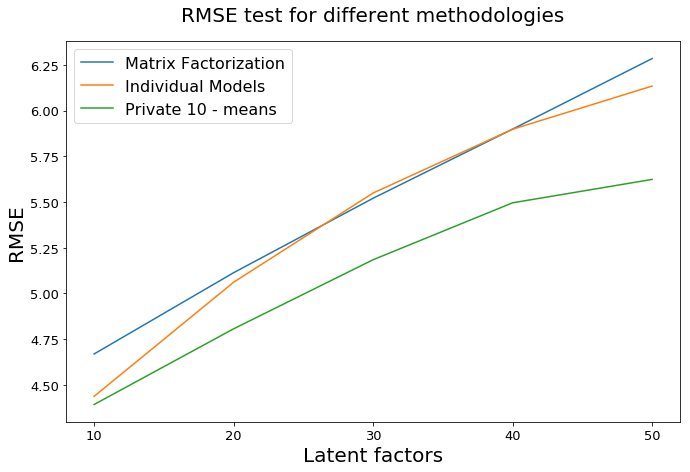

In [75]:

fig, axs = plt.subplots( figsize=(11,7))



#Plot aggregated model

k=10
axs.plot(L,full , label = 'Matrix Factorization')
axs.plot(L, local , label = 'Individual Models')
axs.plot(L, federated[10] , label = 'Private 10 - means'.format(k))


#General features
axs.set_title('RMSE test for different methodologies',fontsize = 20, pad = 20)

axs.set_xlabel('Latent factors',fontsize = 20)
axs.set_ylabel('RMSE',fontsize = 20)

axs.set_xticks(L)
# axs[1].set_xticks(x)
#ax.set_xticklabels([1,4,5], fontsize=12)axs[1].set_xticklabels([10,20,30,40,50])
plt.legend(fontsize=16)
axs.xaxis.set_tick_params(labelsize=13)
axs.yaxis.set_tick_params(labelsize=13)
plt.savefig('exp3/figures/RMSE_test.pdf')
plt.show()

In [79]:
train_sizes = data_all.hospitalid[~data_all.rating_test].value_counts()
all_train = sum(~data_all.rating_test)

full = [RESULTS_full[l]['rmse_train'] for l in L]
local = []
for l in L:
    list_hosp_train = [h for h in list_hosp_all if ~np.isnan(RESULTS_local[(l,h)]['rmse_train'])]
    res = sum(RESULTS_local[(l, h)]['rmse_train']*train_sizes[h]/all_train for h in list_hosp_train if h in train_sizes.index)
    local.append(res)
federated = {}
for k in ks:
    res  = [sum(RESULTS_private[(k,l, h)]['rmse_train']*train_sizes[h]/all_train for h in train_sizes.index) for l in L]
    federated[k] = res
        


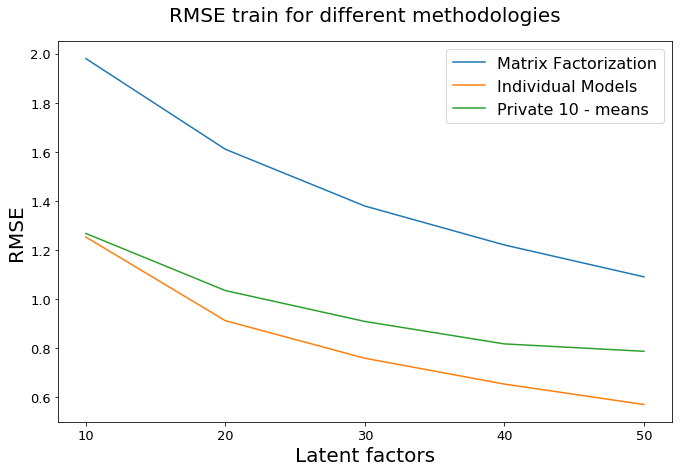

In [80]:

fig, axs = plt.subplots( figsize=(11,7))



#Plot aggregated model

k=10
axs.plot(L,full , label = 'Matrix Factorization')
axs.plot(L, local , label = 'Individual Models')
axs.plot(L, federated[10] , label = 'Private 10 - means'.format(k))


#General features
axs.set_title('RMSE train for different methodologies',fontsize = 20, pad = 20)

axs.set_xlabel('Latent factors',fontsize = 20)
axs.set_ylabel('RMSE',fontsize = 20)

axs.set_xticks(L)
# axs[1].set_xticks(x)
#ax.set_xticklabels([1,4,5], fontsize=12)axs[1].set_xticklabels([10,20,30,40,50])
plt.legend(fontsize=16)
axs.xaxis.set_tick_params(labelsize=13)
axs.yaxis.set_tick_params(labelsize=13)
plt.savefig('exp3/figures/RMSE_train.pdf')
plt.show()

In [81]:
test_sizes = data_all.hospitalid[data_all.rating_test].value_counts()
all_test = sum(data_all.rating_test)

full = [RESULTS_full[l]['avg_rank'] for l in L]
local = []
for l in L:
    list_hosp_test = [h for h in list_hosp_all if ~np.isnan(RESULTS_local[(l,h)]['avg_rank'])]
    res = sum(RESULTS_local[(l, h)]['avg_rank']*test_sizes[h]/all_test for h in list_hosp_test if h in test_sizes.index)
    local.append(res)
federated = {}
for k in ks:
    res  = [sum(RESULTS_private[(k,l, h)]['avg_rank']*test_sizes[h]/all_test for h in test_sizes.index) for l in L]
    federated[k] = res
        


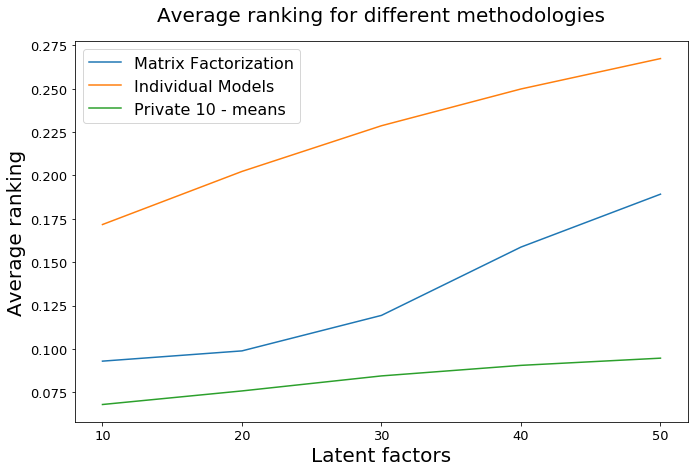

In [83]:

fig, axs = plt.subplots( figsize=(11,7))



#Plot aggregated model

k=10
axs.plot(L,full , label = 'Matrix Factorization')
axs.plot(L, local , label = 'Individual Models')
axs.plot(L, federated[10] , label = 'Private 10 - means'.format(k))


#General features
axs.set_title('Average ranking for different methodologies',fontsize = 20, pad = 20)

axs.set_xlabel('Latent factors',fontsize = 20)
axs.set_ylabel('Average ranking',fontsize = 20)

axs.set_xticks(L)
# axs[1].set_xticks(x)
#ax.set_xticklabels([1,4,5], fontsize=12)axs[1].set_xticklabels([10,20,30,40,50])
plt.legend(fontsize=16)
axs.xaxis.set_tick_params(labelsize=13)
axs.yaxis.set_tick_params(labelsize=13)
plt.savefig('exp3/figures/avg_rank.pdf')
plt.show()